# Machine Learning - Multivariable Regression

### Source: [Udemy](https://www.udemy.com/course/python-data-science-machine-learning-bootcamp/)

### Data: [Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html) and [Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

### The goal is to estimate the price of a property in Boston in today's dollars.

## Import packages

In [151]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



%matplotlib inline

## Gather Data

In [120]:
boston_dataset = load_boston()


dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [71]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [72]:
type(boston_dataset.data)

numpy.ndarray

## Data exploration with Pandas dataframes

In [73]:
# Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns= boston_dataset.feature_names )

# Add a column with the price (target)
data["PRICE"]= boston_dataset.target

In [74]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [75]:
# show us the number of row for each column
data.count() 

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data 

In [76]:
# check for missing values
data.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

### 1- PRICE

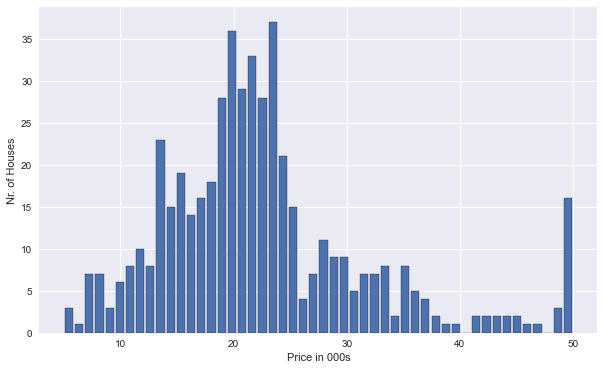

In [78]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(data['PRICE'], bins=50, ec='black', rwidth= 0.8)
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Houses')
plt.show()

### 2- RAD (Accessibility to radial highways)

In [79]:
data["RAD"].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [80]:
frequency = data["RAD"].value_counts()

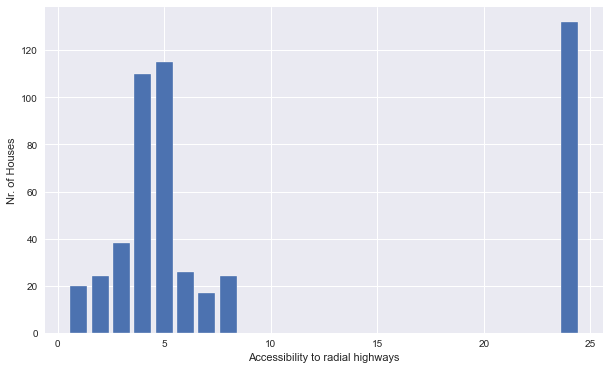

In [81]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10, 6))

#ax.hist(data['RAD'], bins = 25, ec='black', rwidth= 0.8)
ax.bar(x= frequency.index, height=frequency )
plt.xlabel('Accessibility to radial highways')
plt.ylabel('Nr. of Houses')
plt.show()

### 3- CHAS (Charles River dummy variable)

In [82]:
# Dummy variable is used to capture binary information
data["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

### 4- Data.describe()

*Median household income is a more accurate measure for summarizing income at the geographic level as compared to average household income*
*since it is not affected by a small number of extremely high or low income outlier households.*

In [83]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 5- Correlation


#### $$ \rho _{XY} = corr(X,Y)$$
#### $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

#### Plot the correlation

In [84]:
data.corr() # Pearson Correlation Coefficients  is only valid for continuous variables. (not valid for "RAD", "CHAS")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


**Multicollinearity** is a statistical concept where an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity can be an early warning sign that there is some sort of problem because it undermines the statistical significance of an independent variable.

In [85]:
# We will represent our correlation as a triangle instead of the whole table (without the doublicated values)

mask = np.zeros_like(data.corr())
traiangle_indices = np.triu_indices_from(mask)
mask[traiangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

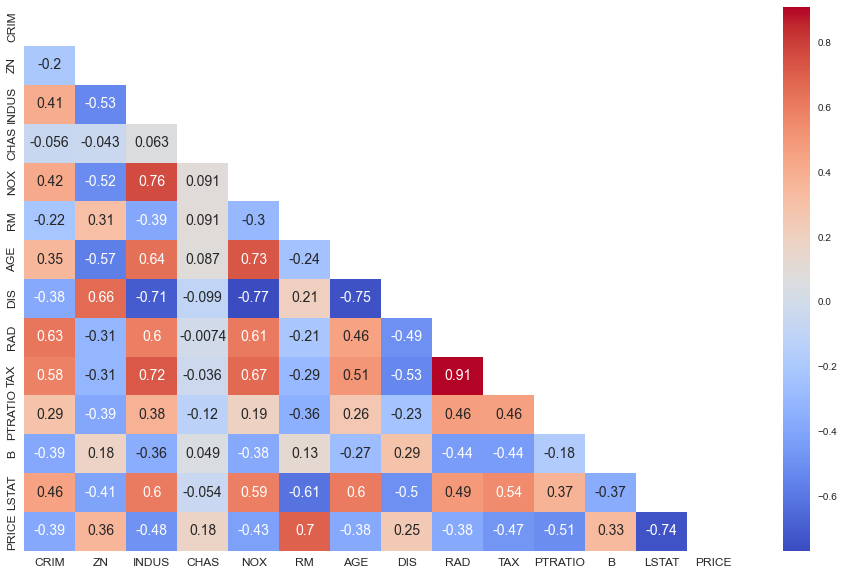

In [86]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(ax=ax, data= data.corr(), mask= mask, cmap="coolwarm", annot=True, annot_kws={"size": 14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Identify strong correlations


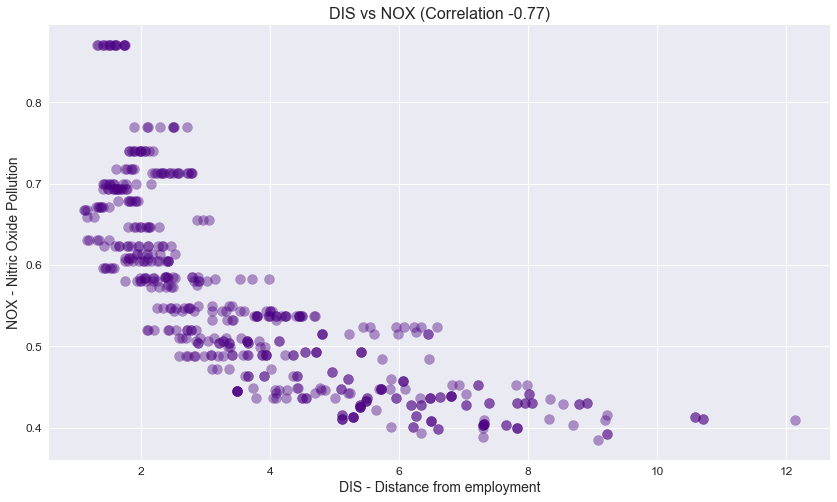

In [87]:
# scatter plot between DIS and NOX
nox_dis_corr = round(data["DIS"].corr(data["NOX"]), 2)

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(x=data['DIS'], y=data['NOX'], alpha=0.4, s=100, color='indigo' )



plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=16)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


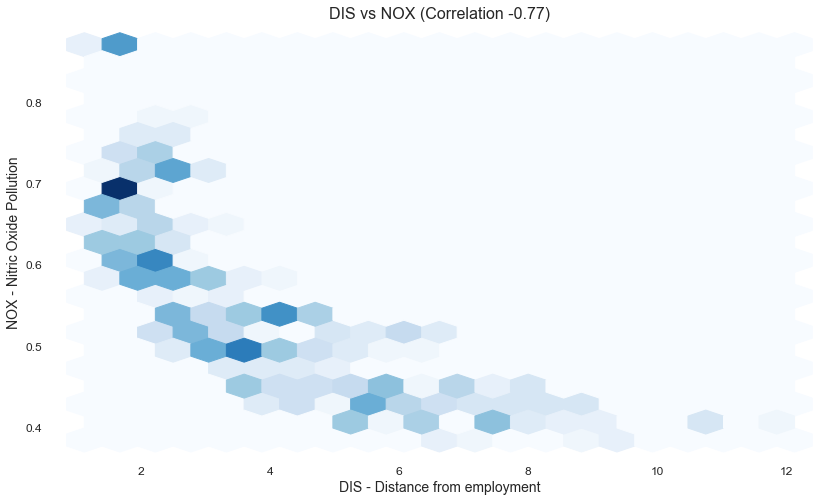

In [88]:
nox_dis_corr = round(data["DIS"].corr(data["NOX"]), 2)

sns.set_style('white')

fig, ax = plt.subplots(figsize=(14, 8))
ax.hexbin(x=data['DIS'], y=data['NOX'], gridsize= 20, cmap= "Blues")

plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=16)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

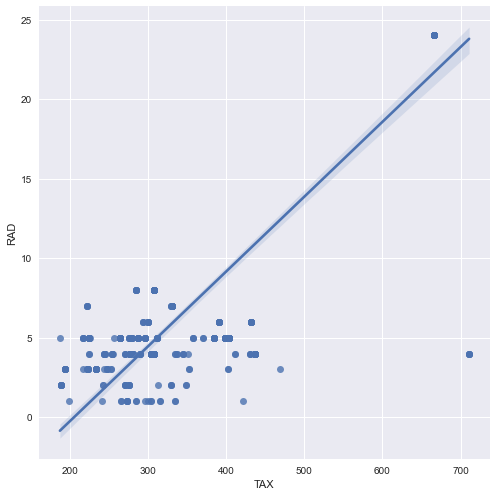

In [89]:
# a scatter plot between TAX and RAD

plt.style.use("seaborn")
sns.lmplot(x='TAX', y='RAD', data=data, height=7)
plt.show()

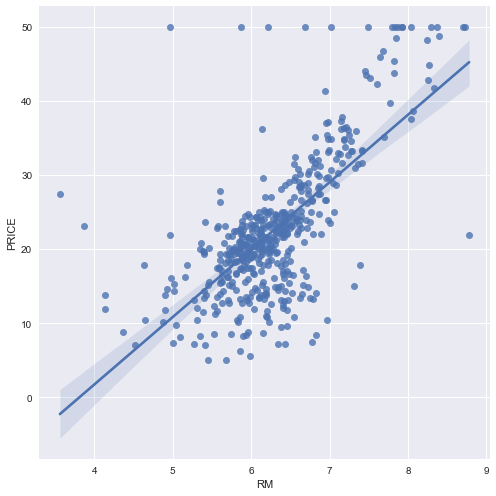

In [90]:
# a scatter plot between the house prices and the number of rooms (RM)
sns.lmplot(x='RM', y='PRICE', data=data, height=7)
plt.show()

#### sns.pairplot

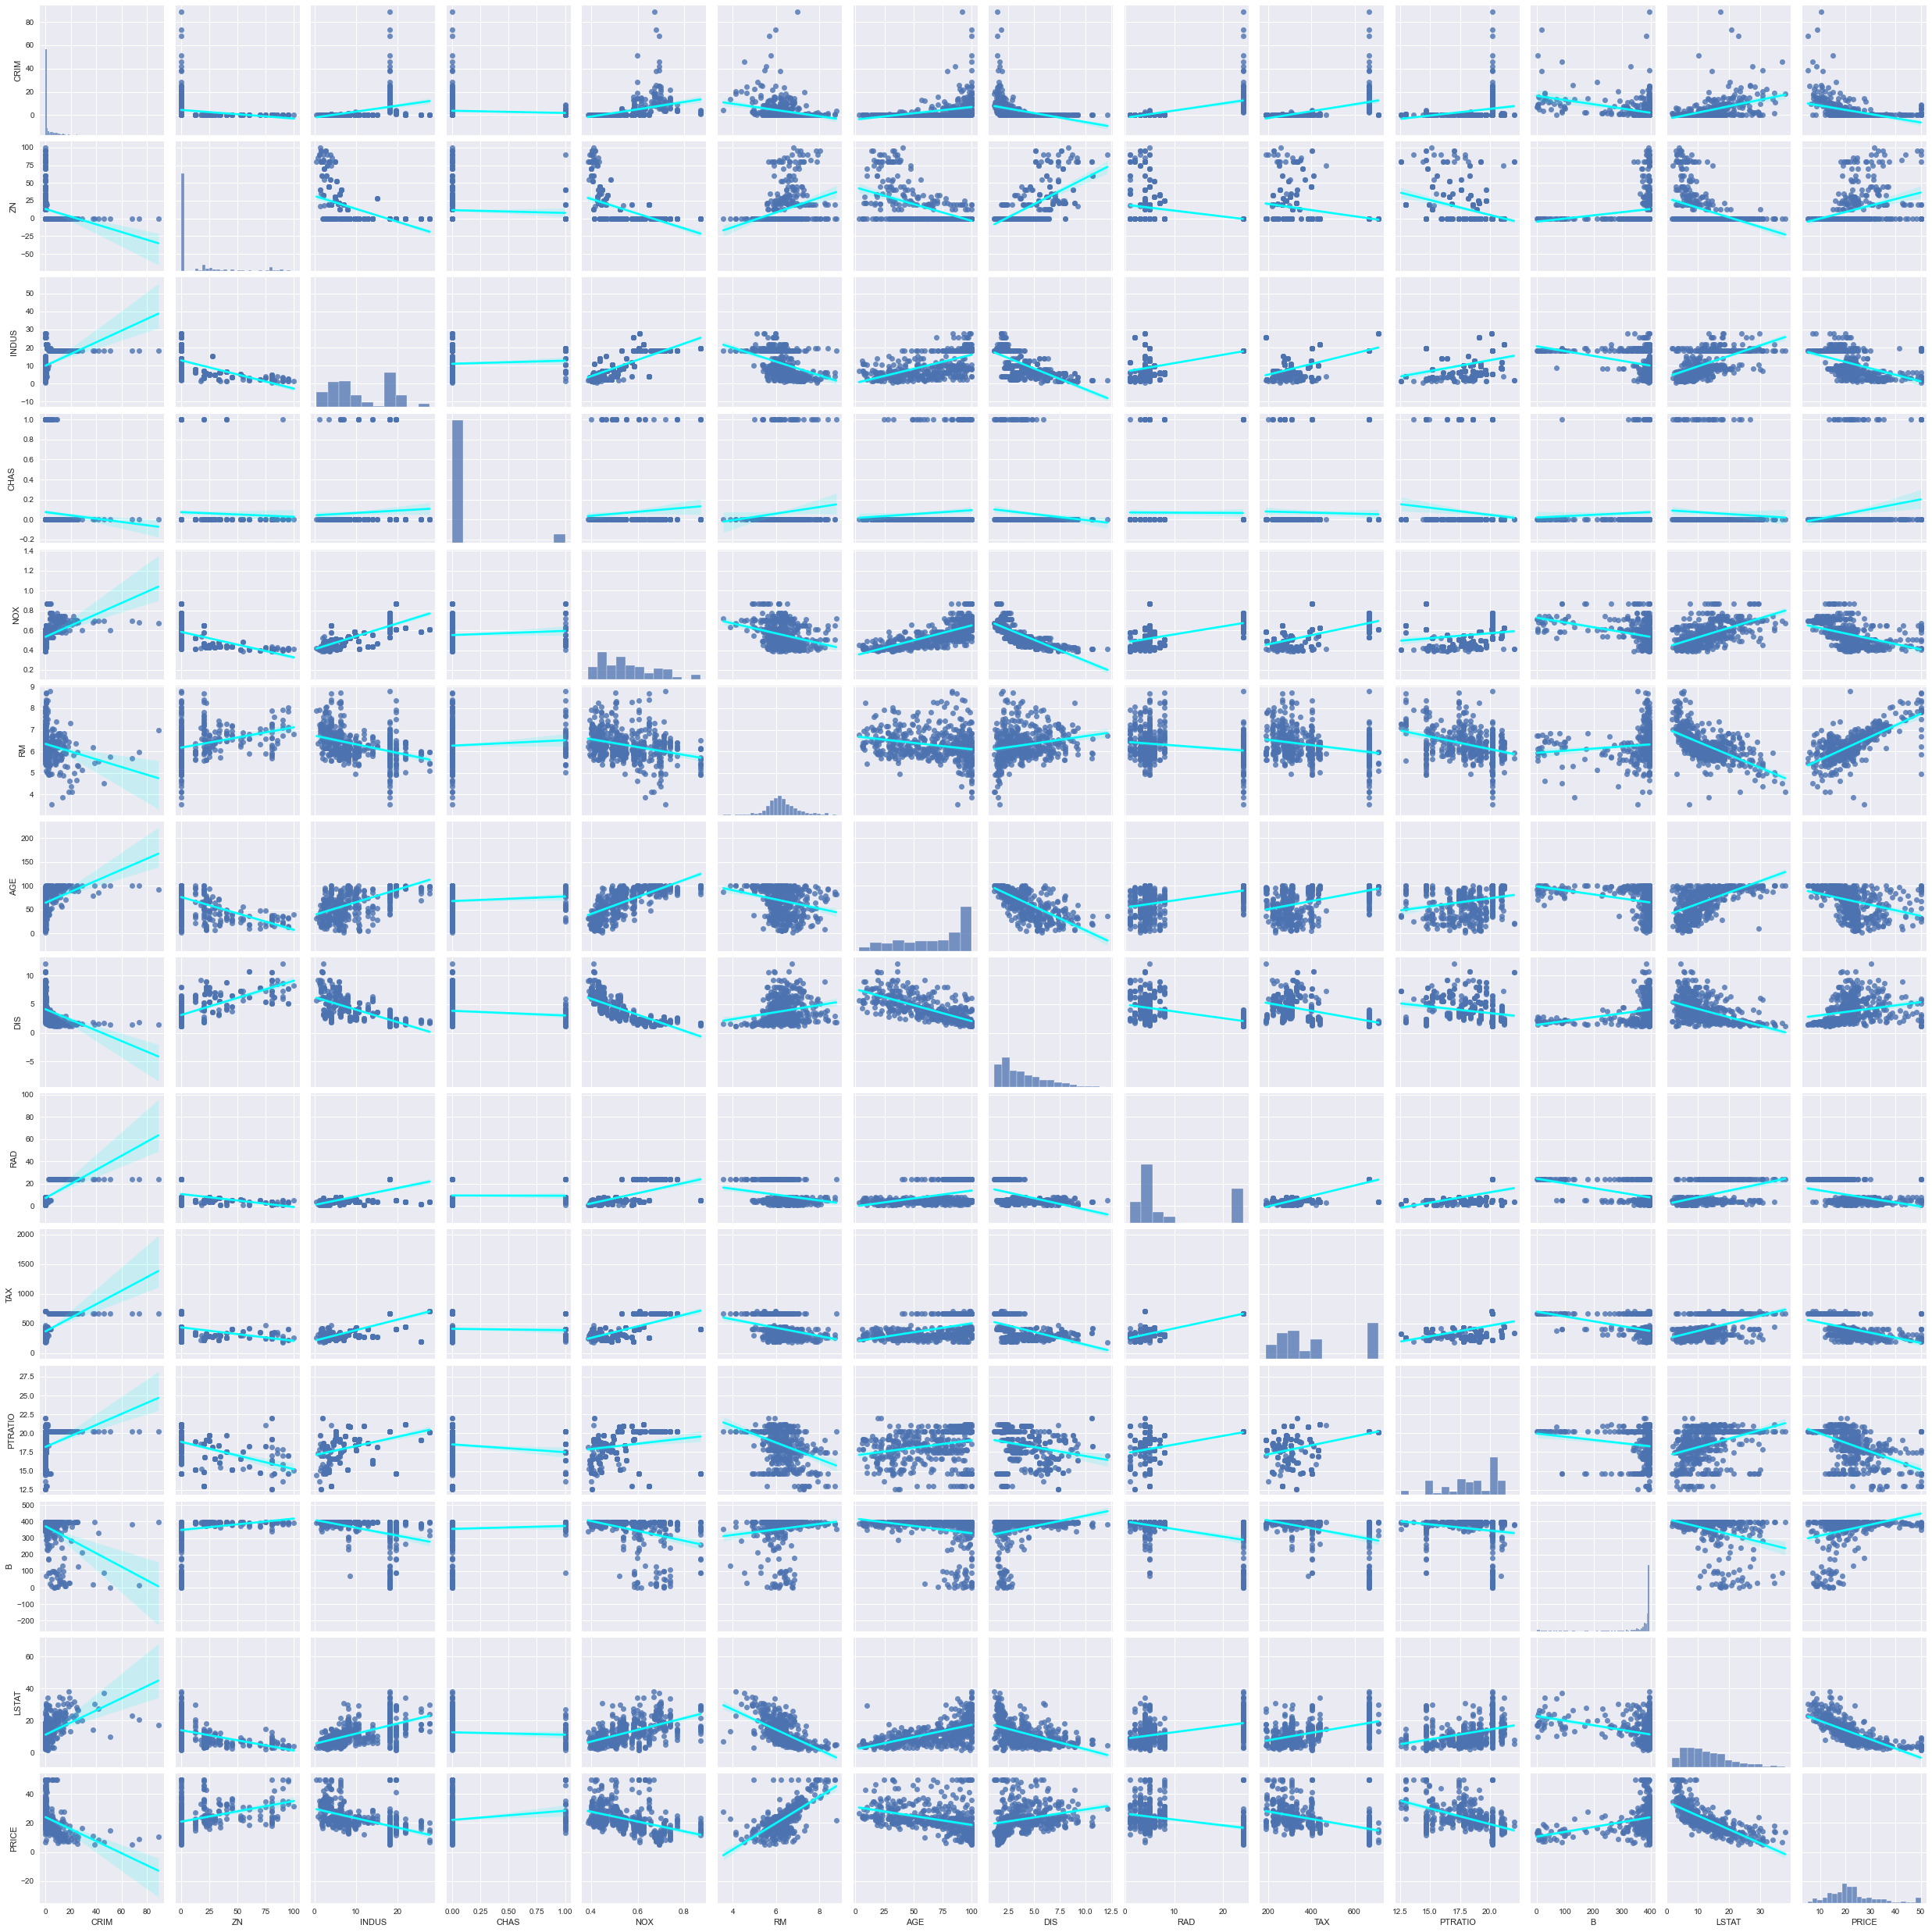

CPU times: total: 2min 23s
Wall time: 32.5 s


In [91]:
%%time

sns.pairplot(data, kind="reg", plot_kws={"line_kws": {"color":"cyan"}})
plt.show()

## Training & Test Dataset Split

In [92]:
prices = data["PRICE"]
features = data.drop("PRICE", axis=1)

#Tuple unpacking
x_train1, x_test1, y_train1, y_test1 = train_test_split(features, prices, test_size= 0.2, random_state=10)

## Multivariable Regression (regr 1)

In [93]:
regr1 = LinearRegression()
regr1.fit(x_train1, y_train1)

LinearRegression()

In [94]:
# r-squared for training and test datasets
print('Training data r-squared:', regr1.score(x_train1, y_train1))
print('Test data r-squared:', regr1.score(x_test1, y_test1))

print("Intercept", regr1.intercept_)
pd.DataFrame(data= regr1.coef_, index= x_train1.columns, columns=["coef"])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115644
Intercept 36.533051382824596


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


All our **coefficients** have a very clear meaning: 
For example an increase in the number of rooms by one will increase the price of the property by 3100 $.

## Model Evaluation

**Skew | R-squared | p-values | V.I.F. | BIC**

### Data Transformation - Log transformation

In [95]:
data["PRICE"].skew()

1.1080984082549072

The skew of a normal distribution is equal to (0) while the skew of our model is equal to (1.1).

Based on the skew in the distribution we will try to improve our model by transformig our price data and as a result shift the distribution.

**Log Transformation** will affect the house prices in the tail more than the rest.

In [96]:
y_log = np.log(data["PRICE"])

In [97]:
y_log.skew()

-0.33032129530987864

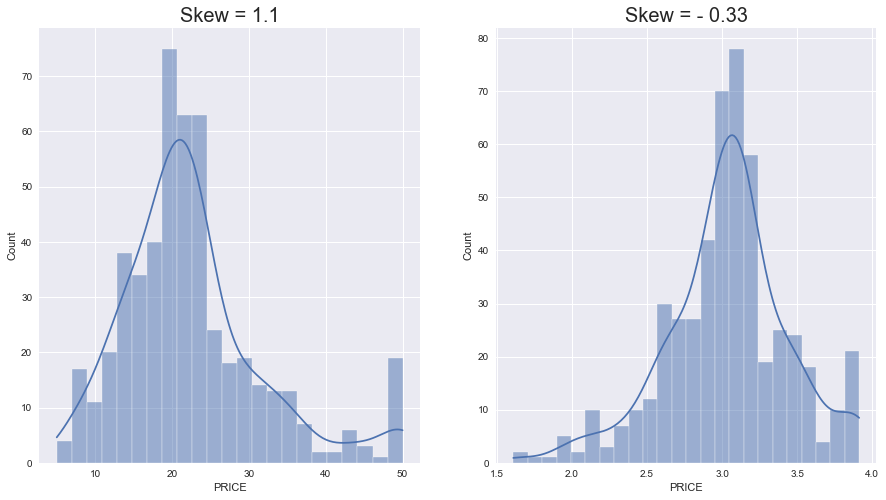

In [98]:
plt.style.use("seaborn")

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

sns.histplot(ax=ax1, data= data["PRICE"], kde=True)
ax1.set_title("Skew = 1.1", fontsize= 20)

sns.histplot(ax=ax2, data= y_log, kde=True)
ax2.set_title("Skew = - 0.33", fontsize= 20)

plt.show()

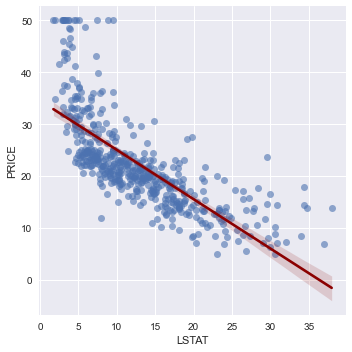

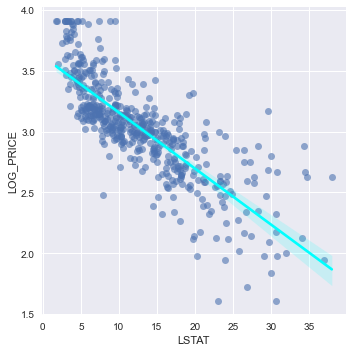

In [99]:
# Check the difference on the regression using "LSTAT" as an example

sns.lmplot(x='LSTAT', y='PRICE', data=data,
           scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})

transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data,
           scatter_kws={'alpha': 0.6}, line_kws={'color':'cyan'})

plt.show()

### Regression using log prices (regr 2)

In [100]:
prices_log = np.log(data["PRICE"])
features = data.drop("PRICE", axis=1)

#Tuple unpacking
x_train2, x_test2, y_train2, y_test2 = train_test_split(features, prices_log, test_size= 0.2, random_state=10)

regr2 = LinearRegression()
regr2.fit(x_train2, y_train2)

# r-squared for training and test datasets
print('Training data r-squared:', regr2.score(x_train2, y_train2))
print('Test data r-squared:', regr2.score(x_test2, y_test2))

print("Intercept", regr2.intercept_)
pd.DataFrame(data= regr2.coef_, index= x_train2.columns, columns=["coef"])

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260727
Intercept 4.059943871775193


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


**Reduced skew in the target allowed us to improve our model, and as a result we have a higher r-squared and a better fit** 

### p values & Evaluating Coefficients

**statsmodel.api as sm**

*p-value < 0.05 means significant*

*p-value > 0.05 means not significant*

$ \hat{y} = \theta _0 + \theta _1 RM + \theta _2 NOX + ... + \theta _{13}LSTAT $

For practical computational purposes we can incorporate const = 1

$ \hat{y} = \theta _0 const + \theta _1 RM + \theta _2 NOX + ... + \theta _{13}LSTAT $

coef of the constant is the intercept

In [101]:
x_incl_const = sm.add_constant(x_train2)

model = sm.OLS(y_train2, x_incl_const)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     114.9
Date:                Thu, 31 Mar 2022   Prob (F-statistic):          1.70e-124
Time:                        06:15:50   Log-Likelihood:                 111.88
No. Observations:                 404   AIC:                            -195.8
Df Residuals:                     390   BIC:                            -139.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0599      0.227     17.880      0.0

In [102]:
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


**Two of our features failed this test; "INDUS" and "AGE"**

*Maybe we can remove these two features from our model*

### Testing for Multicollinearity

We will check the Variance Inflation Factor (VIF)

TAX as an example:

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

we will import VIF function from Statsmodels

In [103]:
x_incl_const.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,1.0,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,1.0,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.0,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,1.0,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,1.0,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69


In [104]:
type(x_incl_const)

pandas.core.frame.DataFrame

We will retrieve nd.array from DataFrame by using .values so we can call VIF function

exog_idx=1 is equal to "CRIM"

In [105]:
#VIF for CRIM
variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)

1.7145250443932492

In [106]:
# calculate VIF for all features
vif = []

for i in range(x_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=x_incl_const.values, exog_idx=i))
    
pd.DataFrame({"feature_name": x_incl_const.columns,
             "vif": np.around(vif, 2)})

,feature_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


How do we interpret this output?

we compare these numbers to a threshold 10

VIF > 10 would be considered porblematic and need closer inspiction.

### Model Simplification & the BIC

One of the easiest way is to remove some of the explanatory variables

Which features should we drop?

Should we remove "INDUS"? 

p-value = 0.445 (not sidnificant)   
has -0.71 correlation with another feature "DIS"

It is really tempting to remove insignificant predictors. But a feature with a low p-value can add value to the model as a whole
by providing some kind of information that the other features do not provide.

**BIC (Baysian Information Criterion)** can help us pick between two or more models.

*lower BIC is better*

Let's compare the model that inklude "INDUS" and the model that exklude "INDUS"

In [107]:
# the model with log prices and all features
x_incl_const = sm.add_constant(x_train2)

model = sm.OLS(y_train2, x_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print("BIC IS", results.bic)
print("r-squared is", results.rsquared)

BIC IS -139.74997769478898
r-squared is 0.7930234826697584


In [108]:
# Reduced model #A excluding INDUS
x_incl_const = sm.add_constant(x_train2)
x_incl_const = x_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train2, x_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -145.14508855591163
r-squared is 0.7927126289415163


In [109]:
# Reduced model #B excluding INDUS and AGE
x_incl_const = sm.add_constant(x_train2)
x_incl_const = x_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train2, x_incl_const)
results = model.fit()

coef_minus_indus_age = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -149.49934294224678
r-squared is 0.7918657661852815


**Removing both INDUS and AGE is actually a beneficial thing.**

In [110]:
frames = [org_coef, coef_minus_indus, coef_minus_indus_age]
pd.concat(frames, axis=1)

,coef,p-value,coef,p-value,coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


**Theta estimates are pretty stable which is a good thing because one of the symptoms of multicollinealrity are unstable coefficients.**

### Residuals & Residual Plots

$ \hat{y} = \theta _0 + \theta _1 RM + \theta _2 NOX + ... + \theta _{11}LSTAT $

$ \hat{y} \neq y $

$ residual = y -  \hat{y} $

*Residuals should be random (no pattern) and normally distributed*

**ALL MODELS ARE WRONG BUT SOME ARE USEFUL**

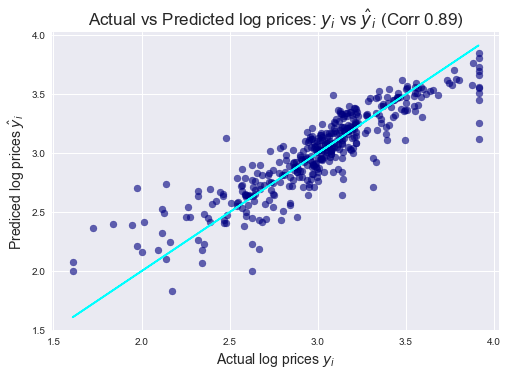

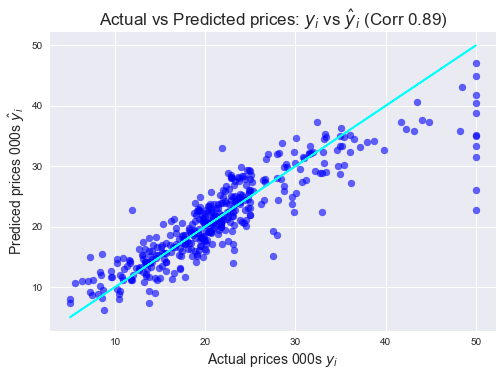

In [111]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(data['PRICE']) # Use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Mean Squared Error & R-squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

# Residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Prediced log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()


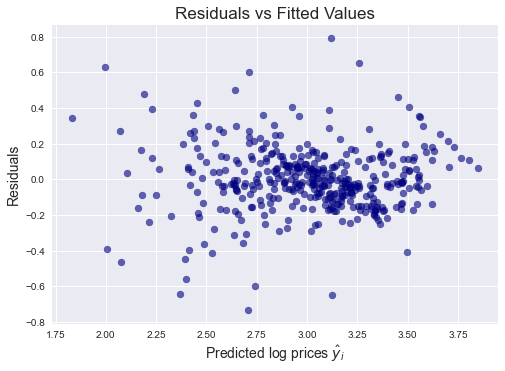

In [112]:
# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

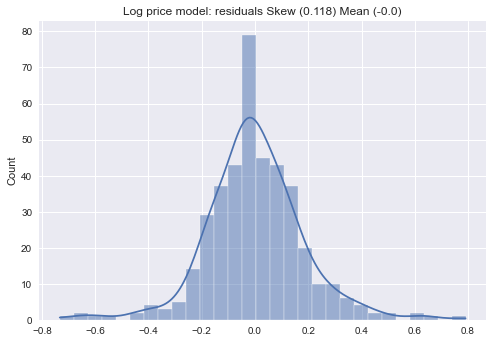

In [113]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.histplot(results.resid, kde= True)
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

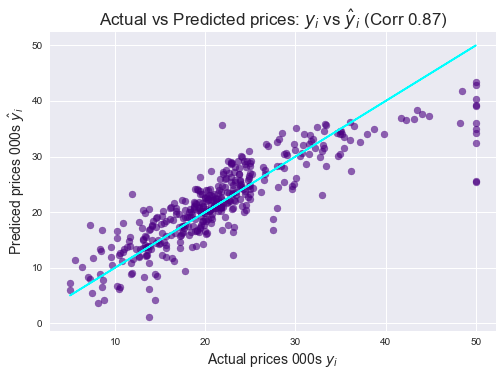

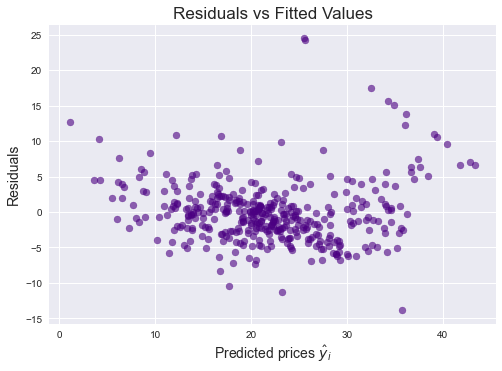

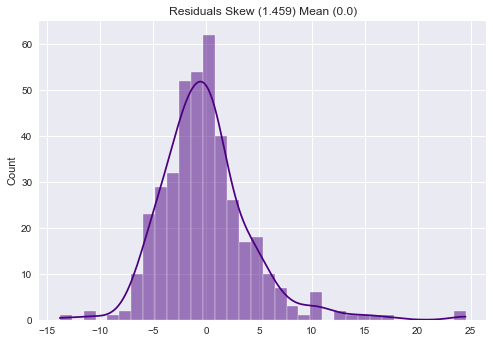

In [114]:
# Original model: normal prices & all features
prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.histplot(results.resid, color='indigo', kde= True)
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $

We're squaring the residuals which makes the mean squared error very sensitive to outliers

In [115]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse], 
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse])}, 
            index=['Reduced Log Model', 'Full Normal Price Model'])



,R-Squared,MSE,RMSE
Reduced Log Model,0.792,0.035,0.187083
Full Normal Price Model,0.750,19.921,4.463295


## Making predictions

How do we get to making a prediction?

We have to provide two things: 

-The estimated property price

-The range that goes with the price (a degree of uncertainty)

**By taking the square root of the MSE we get RMSE which represent one standard deviation (68%) in the distribution of the residuals.**

In [116]:
# An estimate for a house price is $30,000. Calculate the upper and lower bound
# for a 95% prediction interval using the reduced log model

print('1 s.d. in log prices is', np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

1 s.d. in log prices is 0.18708286933869708
2 s.d. in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is  3.7753631203395495
The upper bound in normal prices is $ 43613.34233239937
The lower bound in log prices for a 95% prediction interval is  3.0270316429847615
The lower bound in normal prices is $ 20635.886906824155


## Build a valuation tool

### Create the regression object

In [121]:
# Gather data
boston_dataset = load_boston()
data = pd.DataFrame(data= boston_dataset.data, columns=boston_dataset.feature_names)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [135]:
# remove "INDUS" and "AGE"

features = data.drop(["INDUS","AGE"], axis=1)
print(features.shape)
type(features)

(506, 11)


pandas.core.frame.DataFrame

In [171]:
features.head()

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33


In [136]:
# transform the normal prices to log prices

log_prices = np.log(boston_dataset.target)
print(log_prices.shape)
type(log_prices)

(506,)


numpy.ndarray

In [149]:
# convert log_prices to a DataFrame

target = pd.DataFrame(log_prices, columns=["PRICE"])
print(target.shape)
print(type(target))
print(type(target.values))

(506, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [131]:
# Create an empty array (1 row, 11 columns) that represent a property that we want to predict its price.

property_stats = np.ndarray(shape=(1, 11)) 

We're not going to customaizing all the 11 features becuase it's hard to know the values of most of them in a particular area.

Therefor we're gonna make some assumptions. We're gonna go with the average (mean). 

In [132]:
features.mean()

CRIM         3.613524
ZN          11.363636
CHAS         0.069170
NOX          0.554695
RM           6.284634
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [133]:
type(features.mean())

pandas.core.series.Series

In [145]:
# make property_stats and features.mean have the same kind of objects and same dimentions.

print(features.mean().values.reshape(1, 11).shape)
type(features.mean().values.reshape(1, 11)) 

(1, 11)


numpy.ndarray

In [148]:
property_stats = features.mean().values.reshape(1, 11)
property_stats

array([[3.61352356e+00, 1.13636364e+01, 6.91699605e-02, 5.54695059e-01,
        6.28463439e+00, 3.79504269e+00, 9.54940711e+00, 4.08237154e+02,
        1.84555336e+01, 3.56674032e+02, 1.26530632e+01]])

In [157]:
# create a regression object

regr = LinearRegression().fit(features.values, target.values) # Now "features" and "target" are ndarrays
fitted_vals = regr.predict(features.values)

# MSE and RMSE

MSE = mean_squared_error(target.values, fitted_vals)
RMSE = np.sqrt(mse)

print(MSE, RMSE) # the unit for both are still log dollor prices in thousands

0.03516080084618688 0.18751213519713034


### Create a python function 

We will create a python function which will estimate the log house prices for a specific property.

In [176]:
RM_IDX = 4
PTRATIO_IDX = 8 
CHAS_IDX = 3


def get_log_estimate(nr_rooms, 
                     students_per_classroom, 
                     next_to_river= False, 
                     high_confidence=True):
    

    # Configure property
    property_stats[0][RM_IDX] = nr_rooms
    property_stats[0][PTRATIO_IDX] = students_per_classroom
    
    if next_to_river:
        property_stats[0][CHAS_IDX] = 1
    else:
        property_stats[0][CHAS_IDX] = 0
        
    
    # Make prediction
    log_estimate = regr.predict(property_stats)[0][0]
    
    # Calc Range
    if high_confidence:
        upper_bound = log_estimate + 2*RMSE
        lower_bound = log_estimate - 2*RMSE
        interval = 95
    else:
        upper_bound = log_estimate + RMSE
        lower_bound = log_estimate - RMSE
        interval= 68
    
    return log_estimate, upper_bound, lower_bound, interval
    

In [177]:
get_log_estimate(3, 20, next_to_river=True)

(2.3574867039972838, 2.7325109743915443, 1.9824624336030232, 95)

**Estimate the price of a property in Boston in today's dollars**

In [178]:
# Zillow.com gives us a median estimate for home prices (ZILLOW HOME VALUE INDEX)

ZILLOW_MEDIAN_PRICE = 718.7
SCALE_FACTOR = ZILLOW_MEDIAN_PRICE / np.median(boston_dataset.target)

In [179]:
def get_dollar_estimate(rm, ptratio, chas=False, large_range=True):
    
    """Estimate the price of a property in Boston.
    
    Keyword arguments:
    rm -- number of rooms in the property.
    ptratio -- number of students per teacher in the classroom for the school in the area.
    chas -- True if the property is next to the river, False otherwise.
    large_range -- True for a 95% prediction interval, False for a 68% interval.
    
    """
    
    
    if rm < 1 or ptratio < 1:
        print('That is unrealistic. Try again.')
        return

    log_est, upper, lower, interval = get_log_estimate(nr_rooms= rm, 
                                                   students_per_classroom=ptratio, 
                                                   next_to_river=chas, 
                                                   high_confidence=large_range)

    # Convert to today's dollars
    dollar_est = np.e**log_est * 1000 * SCALE_FACTOR
    dollar_hi = np.e**upper * 1000 * SCALE_FACTOR
    dollar_low = np.e**lower * 1000 * SCALE_FACTOR

    # Round the dollar values to nearest thousand
    rounded_est = np.around(dollar_est, -3)
    rounded_hi = np.around(dollar_hi, -3)
    rounded_low = np.around(dollar_low, -3)

    print(f'The estimated property value is {rounded_est}.')
    print(f'At {interval}% confidence the valuation range is')
    print(f'USD {rounded_low} at the lower end to USD {rounded_hi} at the high end.')

In [184]:
get_dollar_estimate(rm=6, ptratio=12, chas=True)

The estimated property value is 634000.0.
At 95% confidence the valuation range is
USD 436000.0 at the lower end to USD 923000.0 at the high end.
